In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from IPython import display
import json

In [3]:
def read_parameters(filename):
    with open(filename) as f:
        return json.loads(f.read())

In [79]:
#Load without import (So I won't need to restart the kernel all the time)
with open("molecule.py") as f: exec(f.read())
with open("simulation.py") as f: exec(f.read())
with open("multispecies_simulation.py") as f: exec(f.read())

In [52]:
mid = Simulation(read_parameters("./setups/parameters_quick_medium_diffusion.json"))
fast = Simulation(read_parameters("./setups/parameters_quick_fast_diffusion.json"))

mid.run(verbose=False)
fast.run()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

In [56]:
slow = Simulation(read_parameters("./setups/parameters_quick_slow_diffusion.json"))
slow.run()

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

[0.22221171 2.66519362 0.10503726]


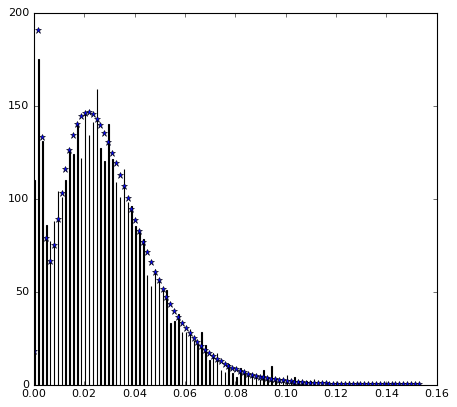

In [90]:
two_species = TwoSpeciesSimulation(mid, slow)
args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(4,
                            bins = 100, p0 = [.2,2,.5])
plt.bar(X,Y, width = .0002)
plt.plot(X, aY, '*')
print(args)